In [1]:
import numpy as np
import os
from pathlib import Path

from e.src.lib.placeholders import (
    ParametrosFisicos,
    NpuntosDireccion,
    ParametrosGeometricos,
    ParametrosComputacionales
)

from e.src.lib.constants import Rutas

from e.src.core._typing import (
    InputsLike,
    List,
    Any
)

import logging
from logging import _nameToLevel

dict_log_level : InputsLike = _nameToLevel

# Configurar logger
logger = logging.getLogger('mna')
logger.setLevel(dict_log_level['DEBUG'])

# Añadir un StreamHandler para mostrar los logs en la consola
console_handler = logging.StreamHandler()
console_handler.setLevel(logging.DEBUG)

# Añadir un formato básico para los mensajes de log
formatter = logging.Formatter('%(name)s - %(levelname)s - %(message)s')
console_handler.setFormatter(formatter)

# Añadir el handler al logger
logger.addHandler(console_handler)

if __name__ == '__main__':
    
    # Crear parámetros físicos y otros.
    temperaturas = ParametrosFisicos(T0=0, T1=50)
    Npuntos = NpuntosDireccion(Nx=100, Ny=100)
    SCparams = ParametrosGeometricos(R=1.0, THETA=np.pi)
    CompParams = ParametrosComputacionales(max_iteraciones=int(1e4), tolerancia=1e-6)
    
    lista_params_holders: List[List[Any]] = [
        list(temperaturas.__dict__.items()),
        list(Npuntos.__dict__.items()), 
        list(SCparams.__dict__.items()), 
        list(CompParams.__dict__.items())
    ]
    
    logger.debug(f"Parametros:")
    for item in lista_params_holders:
        logger.debug(item)
        
    
    # Empiezo el problema.
    u = np.zeros(shape=(Npuntos.Nx, Npuntos.Ny))

    def respetar_condiciones_frontera(u: np.ndarray):
        
        # Dirichlet.
        u[:, 0] = temperaturas.T0   # En theta = 0
        u[:, -1] = temperaturas.T0  # En theta = pi
        u[-1, :] = temperaturas.T1  # En r = 1
        
        # Neumann.
        # u[0, :] = u[1, :]
        
        return u
    
    # def respetar_condiciones_iniciales(u: np.ndarray):
    #     u[0, :] = 0
    #     u[-1, :] = 50
    #     return u

    # Condiciones iniciales.
    # u = respetar_condiciones_iniciales(u)
    u = respetar_condiciones_frontera(u)
    
    
    def metodo_sor(
        u,
        Nx: int,
        Ny: int,
        Dx: float,
        Dy: float,
        omega: float,
        maximas_iteraciones: int,
        tolerancia: float,
    ) -> np.ndarray:
        
        # Iteraciones del método SOR
        for it in range(maximas_iteraciones):
            u_old = np.copy(u)
            
            # Actualizar solo los puntos interiores de la malla
            for i in range(1, Nx - 1):  # Excluir las condiciones en r = 0 y r = 1
                r_i = i * Dx
                for j in range(1, Ny - 1):  # Excluir las condiciones en theta = 0 y theta = pi
                    u_new = (1 / (2 * (1/Dx**2 + 1/(r_i**2 * Dy**2)))) * (
                        (u[i+1, j] + u[i-1, j]) / Dx**2 + 
                        (1 / (r_i**2)) * (u[i, j+1] + u[i, j-1]) / Dy**2
                    )
                    
                    # Sobrerrelajación
                    u[i, j] = (1 - omega) * u[i, j] + omega * u_new
            
            # Para asegurar.
            # u = respetar_condiciones_iniciales(u)
            # u = respetar_condiciones_frontera(u)
            
            logger.info(f"\n")
            logger.info(f"Iteracion: {it}")
            logger.info(f"{u}")
            
            # Criterio de convergencia.
            diff = np.max(np.abs(u - u_old))
            if diff < tolerancia:
                print(f'Convergencia alcanzada en {it} iteraciones.')
                break
        else:
            print('No se alcanzó la convergencia.')

        return u

    solution = metodo_sor(
        u,
        Nx=Npuntos.Nx, 
        Ny=Npuntos.Ny,
        Dx=SCparams.R/Npuntos.Nx, 
        Dy=SCparams.THETA/Npuntos.Ny,
        omega=1.5,
        tolerancia=CompParams.tolerancia,
        maximas_iteraciones=CompParams.max_iteraciones
    )
    


mna - DEBUG - Parametros:
mna - DEBUG - [('T0', 0), ('T1', 50)]
mna - DEBUG - [('Nx', 100), ('Ny', 100)]
mna - DEBUG - [('R', 1.0), ('THETA', 3.141592653589793)]
mna - DEBUG - [('max_iteraciones', 10000), ('tolerancia', 1e-06)]
mna - INFO - 

mna - INFO - Iteracion: 0
mna - INFO - [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.         33.92133505 36.34919691 ... 36.53636309 36.53636309
   0.        ]
 [50.         50.         50.         ... 50.         50.
  50.        ]]
mna - INFO - 

mna - INFO - Iteracion: 1
mna - INFO - [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.   

Convergencia alcanzada en 3682 iteraciones.


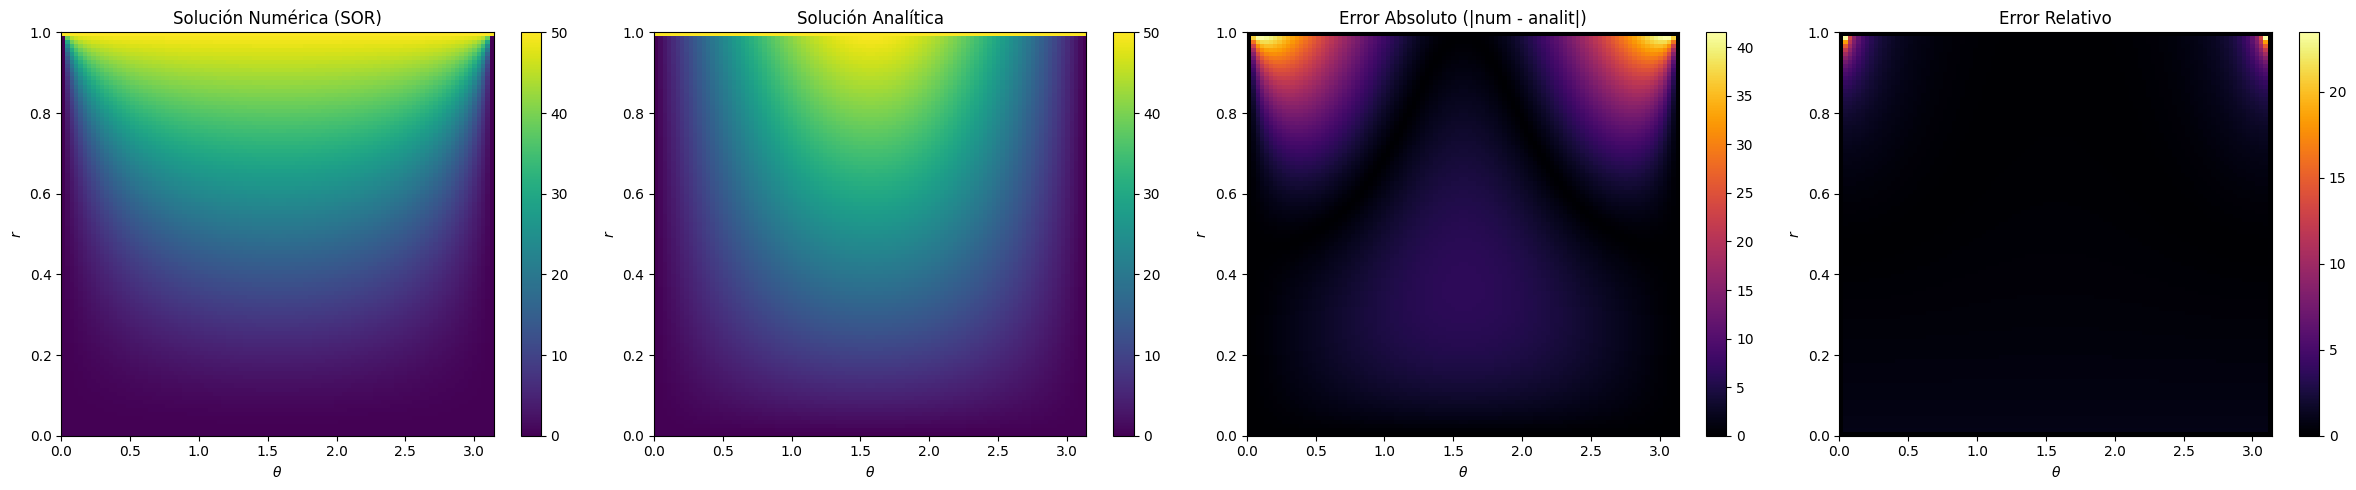

In [2]:
import numpy as np
import os
from pathlib import Path

from e.src.lib.placeholders import (
    ParametrosFisicos,
    NpuntosDireccion,
    ParametrosGeometricos,
    ParametrosComputacionales
)

from e.src.lib.constants import Rutas

from e.src.core._typing import (
    InputsLike,
    List,
    Any
)

import logging
from logging import _nameToLevel

dict_log_level : InputsLike = _nameToLevel

# Configurar logger
logger = logging.getLogger('mna')
logger.setLevel(dict_log_level['DEBUG'])

# Añadir un StreamHandler para mostrar los logs en la consola
console_handler = logging.StreamHandler()
console_handler.setLevel(logging.DEBUG)

# Añadir un formato básico para los mensajes de log
formatter = logging.Formatter('%(name)s - %(levelname)s - %(message)s')
console_handler.setFormatter(formatter)

# Añadir el handler al logger
logger.addHandler(console_handler)

if __name__ == '__main__':
    
    # Crear parámetros físicos y otros.
    temperaturas = ParametrosFisicos(T0=0, T1=50)
    Npuntos = NpuntosDireccion(Nx=100, Ny=100)
    SCparams = ParametrosGeometricos(R=1.0, THETA=np.pi)
    CompParams = ParametrosComputacionales(max_iteraciones=int(1e4), tolerancia=1e-6)
    
    lista_params_holders: List[List[Any]] = [
        list(temperaturas.__dict__.items()),
        list(Npuntos.__dict__.items()), 
        list(SCparams.__dict__.items()), 
        list(CompParams.__dict__.items())
    ]
    
    logger.debug(f"Parametros:")
    for item in lista_params_holders:
        logger.debug(item)
        
    
    # Empiezo el problema.
    u = np.zeros(shape=(Npuntos.Nx, Npuntos.Ny))

    def respetar_condiciones_frontera(u: np.ndarray, theta_vals: np.ndarray):
        # Condiciones de Dirichlet
        u[:, 0] = temperaturas.T0   # En theta = 0
        u[:, -1] = temperaturas.T0  # En theta = pi
        u[-1, :] = temperaturas.T1 * np.sin(theta_vals)  # En r = R
        u[0, :] = 0  # En r = 0
        return u

    
    # def respetar_condiciones_iniciales(u: np.ndarray):
    #     u[0, :] = 0
    #     u[-1, :] = 50
    #     return u

    # Condiciones iniciales.
    # u = respetar_condiciones_iniciales(u)
    u = respetar_condiciones_frontera(u)
    
    
    def metodo_sor(
        u,
        Nx: int,
        Ny: int,
        Dx: float,
        Dy: float,
        omega: float,
        maximas_iteraciones: int,
        tolerancia: float,
        r_vals: np.ndarray
    ) -> np.ndarray:
        
        for it in range(maximas_iteraciones):
            u_old = np.copy(u)
            
            for i in range(1, Nx - 1):  # Excluimos los bordes
                r_i = r_vals[i]
                for j in range(1, Ny - 1):
                    # Coeficientes de la ecuación
                    Ar = (1 / Dx**2) - (1 / (2 * r_i * Dx))
                    Br = -2 / Dx**2
                    Cr = (1 / Dx**2) + (1 / (2 * r_i * Dx))
                    Dθ = 1 / (r_i**2 * Dy**2)
                    
                    # Numerador de la ecuación
                    numerador = (
                        -Ar * u[i - 1, j]
                        - Br * u[i, j]
                        - Cr * u[i + 1, j]
                        - Dθ * (u[i, j - 1] + u[i, j + 1])
                    )
                    
                    # Actualización SOR
                    u_new = u[i, j] + omega * (numerador / (-Br) - u[i, j])
                    u[i, j] = u_new
            
            # Aplicar condiciones de frontera
            u = respetar_condiciones_frontera(u, theta_vals)
            
            # Verificación de convergencia
            diff = np.max(np.abs(u - u_old))
            if diff < tolerancia:
                print(f'Convergencia alcanzada en {it} iteraciones.')
                break
        else:
            print('No se alcanzó la convergencia.')

        return u
    
    solution = metodo_sor(
        u,
        Nx=Npuntos.Nx, 
        Ny=Npuntos.Ny,
        Dx=SCparams.R/Npuntos.Nx, 
        Dy=SCparams.THETA/Npuntos.Ny,
        omega=1.5,
        tolerancia=CompParams.tolerancia,
        maximas_iteraciones=CompParams.max_iteraciones
    )
    


import numpy as np
import matplotlib.pyplot as plt

def solucion_analitica(r: np.ndarray, theta: np.ndarray, R: float) -> np.ndarray:
    """
    Solución analítica aproximada para el problema de la ecuación de Laplace en coordenadas polares.
    """
    return 50 * r * np.sin(theta)


# Crear la malla de r y theta para la solución analítica.
r_vals = np.linspace(0, SCparams.R, Npuntos.Nx)
theta_vals = np.linspace(0, SCparams.THETA, Npuntos.Ny)
r_grid, theta_grid = np.meshgrid(r_vals, theta_vals, indexing='ij')

# Obtener la solución analítica
u_analitica = solucion_analitica(r_grid, theta_grid, SCparams.R)

u_analitica = respetar_condiciones_frontera(u_analitica)

# Comparar la solución numérica con la analítica.
error = np.abs(solution - u_analitica)
error_relativo = np.abs((solution - u_analitica) / (u_analitica + 1e-10))  # Evitar división por 0

# Mostrar los resultados.
fig, ax = plt.subplots(1, 4, figsize=(24, 5))

# Solución numérica.
im1 = ax[0].imshow(solution, extent=[0, np.pi, 0, SCparams.R], origin='lower', aspect='auto')
ax[0].set_title('Solución Numérica (SOR)')
ax[0].set_xlabel(r'$\theta$')
ax[0].set_ylabel(r'$r$')
plt.colorbar(im1, ax=ax[0])

# Solución analítica.
im2 = ax[1].imshow(u_analitica, extent=[0, np.pi, 0, SCparams.R], origin='lower', aspect='auto')
ax[1].set_title('Solución Analítica')
ax[1].set_xlabel(r'$\theta$')
ax[1].set_ylabel(r'$r$')
plt.colorbar(im2, ax=ax[1])

# Error absoluto.
im3 = ax[2].imshow(error, extent=[0, np.pi, 0, SCparams.R], origin='lower', aspect='auto', cmap='inferno')
ax[2].set_title('Error Absoluto (|num - analit|)')
ax[2].set_xlabel(r'$\theta$')
ax[2].set_ylabel(r'$r$')
plt.colorbar(im3, ax=ax[2])

# Error relativo.
im4 = ax[3].imshow(error_relativo, extent=[0, np.pi, 0, SCparams.R], origin='lower', aspect='auto', cmap='inferno')
ax[3].set_title('Error Relativo')
ax[3].set_xlabel(r'$\theta$')
ax[3].set_ylabel(r'$r$')
plt.colorbar(im4, ax=ax[3])

plt.tight_layout()
plt.show()

mna - INFO - Iteración: 0, Diferencia máxima: 36.53558054826702
mna - INFO - Iteración: 0, Diferencia máxima: 36.53558054826702
mna - INFO - Iteración: 1000, Diferencia máxima: 1.2401179141363627e-06
mna - INFO - Iteración: 1000, Diferencia máxima: 1.2401179141363627e-06


Convergencia alcanzada en 1018 iteraciones.


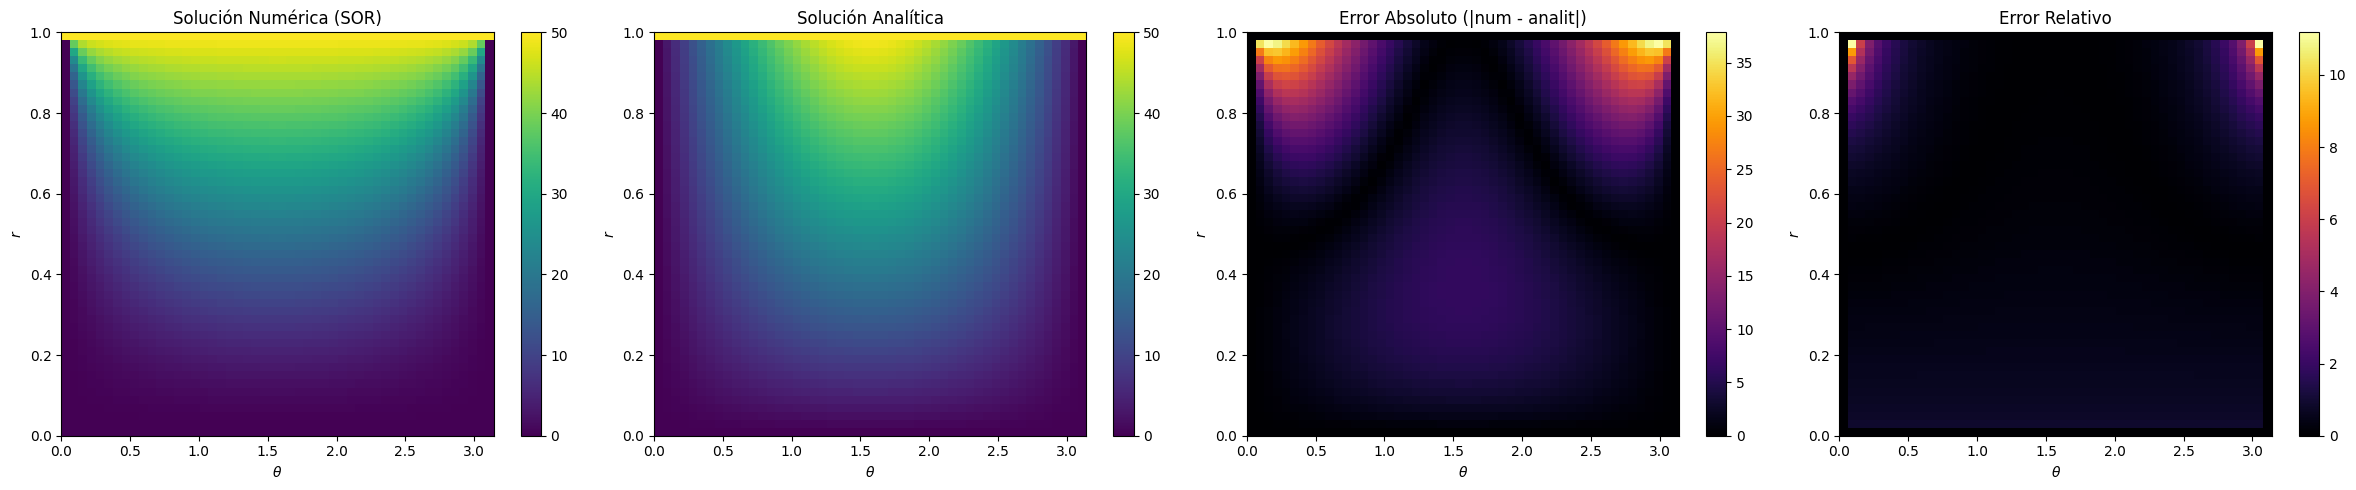

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import logging

# Configuración del logger
logger = logging.getLogger('mna')
logger.setLevel(logging.DEBUG)
console_handler = logging.StreamHandler()
console_handler.setLevel(logging.DEBUG)
formatter = logging.Formatter('%(name)s - %(levelname)s - %(message)s')
console_handler.setFormatter(formatter)
if not logger.handlers:
    logger.addHandler(console_handler)

# Parámetros físicos y computacionales
class ParametrosFisicos:
    def __init__(self, T0, T1):
        self.T0 = T0
        self.T1 = T1

class NpuntosDireccion:
    def __init__(self, Nx, Ny):
        self.Nx = Nx
        self.Ny = Ny

class ParametrosGeometricos:
    def __init__(self, R, THETA):
        self.R = R
        self.THETA = THETA

class ParametrosComputacionales:
    def __init__(self, max_iteraciones, tolerancia):
        self.max_iteraciones = max_iteraciones
        self.tolerancia = tolerancia

if __name__ == '__main__':
    
    # Crear parámetros físicos y otros.
    temperaturas = ParametrosFisicos(T0=0, T1=50)
    Npuntos = NpuntosDireccion(Nx=50, Ny=50)  # Aumentamos la resolución
    SCparams = ParametrosGeometricos(R=1.0, THETA=np.pi)
    CompParams = ParametrosComputacionales(max_iteraciones=int(1e5), tolerancia=1e-6)
    
    # Crear malla
    r_vals = np.linspace(0, SCparams.R, Npuntos.Nx)
    theta_vals = np.linspace(0, SCparams.THETA, Npuntos.Ny)
    r_grid, theta_grid = np.meshgrid(r_vals, theta_vals, indexing='ij')
    
    # Inicializar u
    u = np.zeros((Npuntos.Nx, Npuntos.Ny))
    
    # Función para aplicar condiciones de frontera
    def respetar_condiciones_frontera(u: np.ndarray, theta_vals: np.ndarray):
        u[:, 0] = temperaturas.T0  # En theta = 0
        u[:, -1] = temperaturas.T0  # En theta = pi
        u[-1, :] = temperaturas.T1# En r = R
        u[0, :] = temperaturas.T0  # En r = 0
        return u
    
    # Aplicar condiciones iniciales
    u = respetar_condiciones_frontera(u, theta_vals)
    
    # Método SOR corregido
    def metodo_sor(
        u,
        Nx: int,
        Ny: int,
        Dx: float,
        Dy: float,
        omega: float,
        maximas_iteraciones: int,
        tolerancia: float,
        r_vals: np.ndarray,
        theta_vals: np.ndarray
    ) -> np.ndarray:
        
        for it in range(maximas_iteraciones):
            u_old = np.copy(u)
            
            for i in range(1, Nx - 1):
                r_i = r_vals[i]
                for j in range(1, Ny - 1):
                    # Evitar división por cero
                    if r_i == 0:
                        continue
                    
                    # Fórmula estándar de SOR para coordenadas polares
                    term_r = (u[i+1, j] + u[i-1, j]) / Dx**2
                    term_theta = (u[i, j+1] + u[i, j-1]) / (r_i**2 * Dy**2)
                    denominator = 2 * (1/Dx**2 + 1/(r_i**2 * Dy**2))
                    
                    u_new = (1 - omega) * u[i, j] + (omega / denominator) * (term_r + term_theta)
                    u[i, j] = u_new
            
            # Aplicar condiciones de frontera
            u = respetar_condiciones_frontera(u, theta_vals)
    
            # Verificación de convergencia
            diff = np.max(np.abs(u - u_old))
            if it % 1000 == 0:
                logger.info(f'Iteración: {it}, Diferencia máxima: {diff}')
            if diff < tolerancia:
                print(f'Convergencia alcanzada en {it} iteraciones.')
                break
        else:
            print('No se alcanzó la convergencia.')
    
        return u
    
    # Parámetros para el método SOR
    Dx = SCparams.R / (Npuntos.Nx - 1)
    Dy = SCparams.THETA / (Npuntos.Ny - 1)
    omega = 1.5  # Puedes experimentar con valores entre 1.0 y 1.9
    
    # Ejecutar el método SOR
    solution = metodo_sor(
        u,
        Nx=Npuntos.Nx, 
        Ny=Npuntos.Ny,
        Dx=Dx, 
        Dy=Dy,
        omega=omega,
        tolerancia=CompParams.tolerancia,
        maximas_iteraciones=CompParams.max_iteraciones,
        r_vals=r_vals,
        theta_vals=theta_vals
    )
    
    # Solución analítica
    def solucion_analitica(r: np.ndarray, theta: np.ndarray) -> np.ndarray:
        return 50 * r * np.sin(theta)
    
    u_analitica = solucion_analitica(r_grid, theta_grid)
    u = respetar_condiciones_frontera(u_analitica, theta_vals)
    
    # Cálculo del error
    error = np.abs(solution - u_analitica)
    error_relativo = np.abs((solution - u_analitica) / (u_analitica + 1e-10))  # Evitar división por 0
    
    # Visualización
    fig, ax = plt.subplots(1, 4, figsize=(24, 5))
    
    extent = [0, SCparams.THETA, 0, SCparams.R]
    
    im1 = ax[0].imshow(solution, extent=extent, origin='lower', aspect='auto')
    ax[0].set_title('Solución Numérica (SOR)')
    ax[0].set_xlabel(r'$\theta$')
    ax[0].set_ylabel(r'$r$')
    plt.colorbar(im1, ax=ax[0])
    
    im2 = ax[1].imshow(u_analitica, extent=extent, origin='lower', aspect='auto')
    ax[1].set_title('Solución Analítica')
    ax[1].set_xlabel(r'$\theta$')
    ax[1].set_ylabel(r'$r$')
    plt.colorbar(im2, ax=ax[1])
    
    im3 = ax[2].imshow(error, extent=extent, origin='lower', aspect='auto', cmap='inferno')
    ax[2].set_title('Error Absoluto (|num - analit|)')
    ax[2].set_xlabel(r'$\theta$')
    ax[2].set_ylabel(r'$r$')
    plt.colorbar(im3, ax=ax[2])
    
    im4 = ax[3].imshow(error_relativo, extent=extent, origin='lower', aspect='auto', cmap='inferno')
    ax[3].set_title('Error Relativo')
    ax[3].set_xlabel(r'$\theta$')
    ax[3].set_ylabel(r'$r$')
    plt.colorbar(im4, ax=ax[3])
    
    plt.tight_layout()
    plt.show()


In [13]:
u_analitica[-2,:]

array([0.00000000e+00, 1.52008953e+01, 2.85683382e+01, 3.84900179e+01,
       4.37692335e+01, 4.37692335e+01, 3.84900179e+01, 2.85683382e+01,
       1.52008953e+01, 5.44287466e-15])